In [321]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_excel(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\1. data_gathering\spam.xlsx')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [322]:
data.shape

(5572, 5)

In [323]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [324]:
data.rename(columns={'v1': 'ham_or_spam', 'v2':'mail'}, inplace=True)
data.head(5)

,ham_or_spam,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [325]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['ham_or_spam'] = encoder.fit_transform(data['ham_or_spam'])
data.head(5)

,ham_or_spam,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [326]:
data.isnull().sum()

ham_or_spam    0
mail           0
dtype: int64

In [327]:
data.duplicated().sum()

np.int64(403)

In [328]:
data = data.drop_duplicates(keep='first')

In [329]:
data.duplicated().sum()

np.int64(0)

In [330]:
data.shape

(5169, 2)

In [331]:
data['ham_or_spam'].value_counts()

ham_or_spam
0    4516
1     653
Name: count, dtype: int64

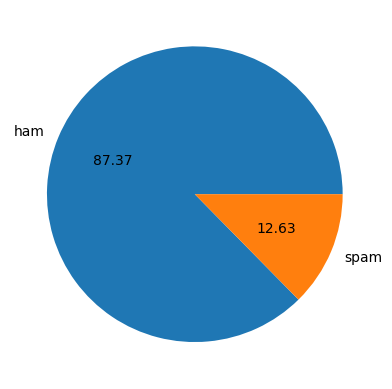

In [332]:
import matplotlib.pyplot as plt 
plt.pie(data['ham_or_spam'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [333]:
# data is imbalanced

In [334]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarvesh.kesharwani\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!


True

In [335]:
data.sample(3)

,ham_or_spam,mail
205,0,ÌÏ say until like dat i dun buy ericsson oso c...
4955,0,Ahhhh...just woken up!had a bad dream about u ...
5445,0,"And that's fine, I got enough bud to last most..."


In [336]:
data['num_characters'] = data['mail'].astype(str).apply(len)
data.sample(3)

,ham_or_spam,mail,num_characters
751,1,You have an important customer service announc...,65
5470,0,I thought slide is enough.,26
5087,0,"Good morning, im suffering from fever and dyse...",94


In [337]:
data['mail'] = data['mail'].astype(str)

In [338]:
data['num_words'] = data['mail'].apply(lambda x: len(nltk.word_tokenize(str(x))))
data.sample(3)

,ham_or_spam,mail,num_characters,num_words
2928,0,Where wuld I be without my baby? The thought a...,129,27
4581,0,Wow didn't think it was that common. I take it...,95,27
646,0,Do you mind if I ask what happened? You dont h...,80,19


In [339]:
data['num_sentences'] = data['mail'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head(3)

,ham_or_spam,mail,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [340]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [341]:
# ham
data[data['ham_or_spam']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [342]:
# spam
data[data['ham_or_spam']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


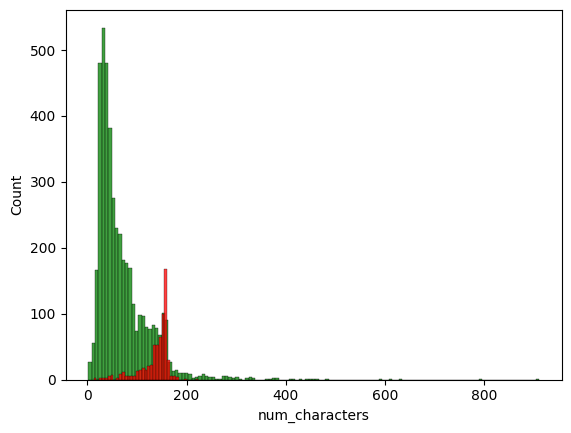

In [343]:
import seaborn as sns 

# hist comparison of num of characters in both categories
sns.histplot(data[data['ham_or_spam']==0]['num_characters'], color='g')
sns.histplot(data[data['ham_or_spam']==1]['num_characters'], color='r')
plt.show()

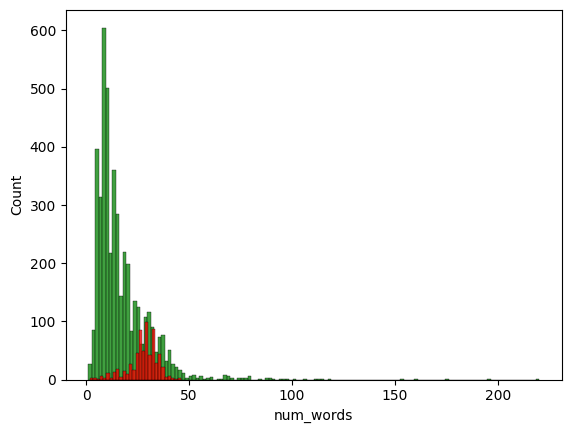

In [344]:
# hist comparison of num of words in both categories
sns.histplot(data[data['ham_or_spam']==0]['num_words'], color='g')
sns.histplot(data[data['ham_or_spam']==1]['num_words'], color='r')
plt.show()

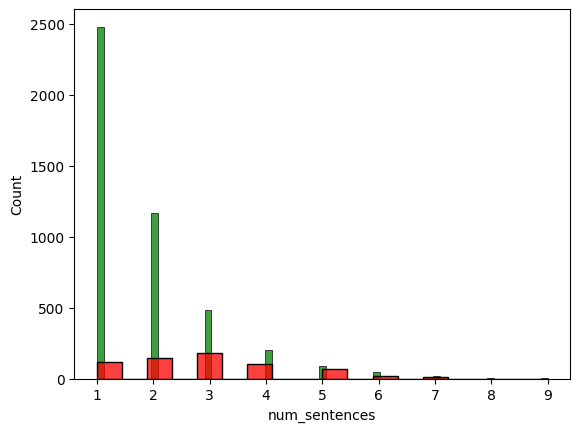

In [345]:
# hist comparison of num of sentences in both categories
sns.histplot(data[(data['ham_or_spam']==0) & (data['num_sentences']<10)]['num_sentences'], color='g')
sns.histplot(data[(data['ham_or_spam']==1) & (data['num_sentences']<10)]['num_sentences'], color='r')
plt.show()

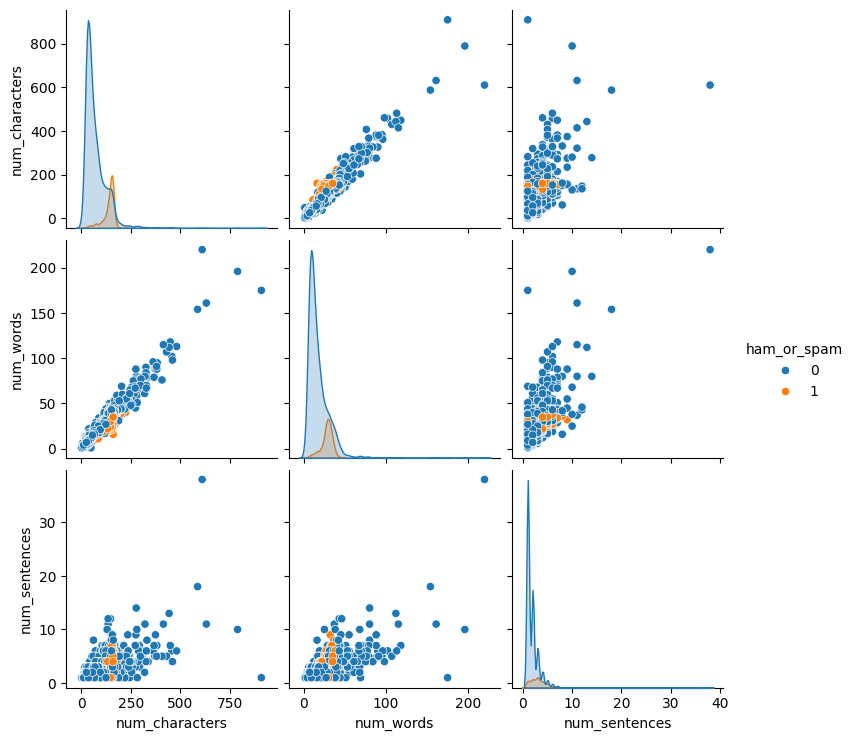

In [346]:
sns.pairplot(data, hue='ham_or_spam')

In [347]:
data.sample(3)

,ham_or_spam,mail,num_characters,num_words,num_sentences
2986,0,"I'm there and I can see you, but you can't see...",96,26,3
4827,0,Lol no. Just trying to make your day a little ...,62,13,2
4047,0,Lol or I could just starve and lose a pound by...,66,17,1


In [348]:
data1 = data.drop(columns=['mail'])

<Axes: >

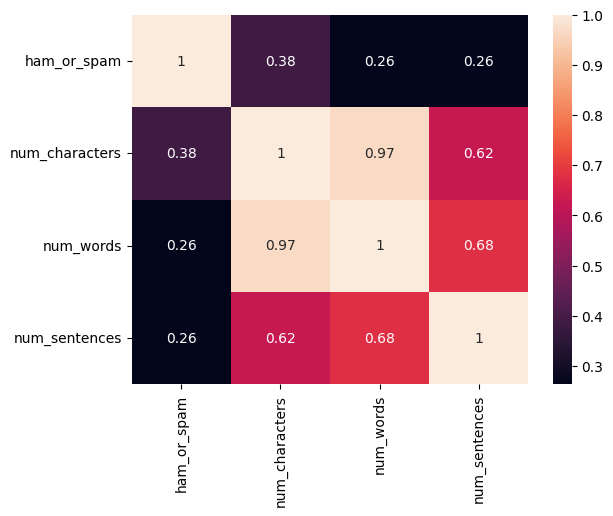

In [349]:
sns.heatmap(data1.corr(), annot=True)

# Data Preprocessing

In [350]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [351]:
import string 
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [352]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [353]:
def transform_text(text):
    translator = str.maketrans('', '', string.punctuation)
    ps = PorterStemmer()

    text = text.lower()
    text = nltk.word_tokenize(text)
    clean_text=[]
    for word in text:
        if word not in stopwords.words('english'):
            word = word.translate(translator)
            if word.isalnum():
                clean_text.append(ps.stem(word))
    return ' '.join(clean_text)

In [354]:
transform_text("sarvesh's dragon is playing game!")

'sarvesh s dragon play game'

In [355]:
data['clean_mail'] = data['mail'].apply(transform_text)
data = data[['mail', 'clean_mail', 'num_characters', 'num_words', 'num_sentences', 'ham_or_spam']]
data.head()

,mail,clean_mail,num_characters,num_words,num_sentences,ham_or_spam
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,24,2,0
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,8,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,1
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,13,1,0
4,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,61,15,1,0


In [356]:
data['clean_mail'].iloc[4]

'nah nt think goe usf live around though'

In [357]:
data.sample(5)

,mail,clean_mail,num_characters,num_words,num_sentences,ham_or_spam
3574,And do you have any one that can teach me how ...,one teach ship car,59,15,1,0
1352,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...,let ur heart ur compass ur mind ur map ur soul...,121,27,1,0
1994,Have you been practising your curtsey?,practis curtsey,38,7,1,0
5557,No. I meant the calculation is the same. That ...,meant calcul lt gt unit lt gt school realli ex...,273,67,7,0
734,Leaving to qatar tonite in search of an opport...,leav qatar tonit search opportunityal went fas...,103,17,1,0


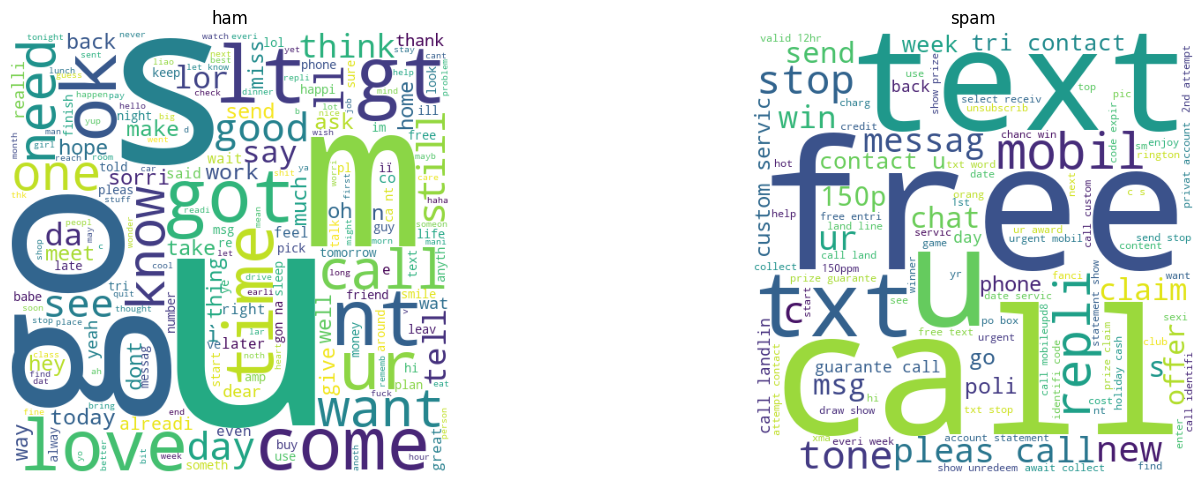

In [358]:
from wordcloud import WordCloud

wc1 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
wc2 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
ham_wc = wc1.generate(data[data['ham_or_spam']==0]['clean_mail'].str.cat(sep=' '))
spam_wc = wc2.generate(data[data['ham_or_spam']==1]['clean_mail'].str.cat(sep=' '))

figure, axis = plt.subplots(1, 2, figsize=(15,5))
plt.tight_layout()
axis[0].imshow(ham_wc)
axis[0].axis("off")
axis[0].set_title("ham")


axis[1].imshow(spam_wc)
axis[1].axis("off")
axis[1].set_title("spam")
plt.show()

Series([], Name: clean_mail, dtype: object)

In [365]:
spam_corpus = []
for msg in data[data['ham_or_spam'] == 1]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        spam_corpus.append(word)

len(spam_corpus), spam_corpus

(10775,
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  's',
  'appli',
  '08452810075over18',
  's',
  'freemsg',
  'hey',
  'darl',
  's',
  '3',
  'week',
  's',
  'word',
  'back',
  'd',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv',
  'winner',
  'valu',
  'network',
  'custom',
  'select',
  'receivea',
  'prize',
  'reward',
  'claim',
  'call',
  '09061701461',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hour',
  'mobil',
  '11',
  'month',
  'u',
  'r',
  'entitl',
  'updat',
  'latest',
  'colour',
  'mobil',
  'camera',
  'free',
  'call',
  'mobil',
  'updat',
  'co',
  'free',
  '08002986030',
  'six',
  'chanc',
  'win',
  'cash',
  '100',
  '20000',
  'pound',
  'txt',
  'csh11',
  'send',
  '87575',
  'cost',
  '150pday',
  '6day',
  '16',


In [369]:
pd.DataFrame(Counter(spam_corpus).most_common(25))

,0,1
0,call,321
1,free,191
2,2,157
3,txt,141
4,u,135
5,text,122
6,ur,119
7,mobil,114
8,stop,106
9,repli,103


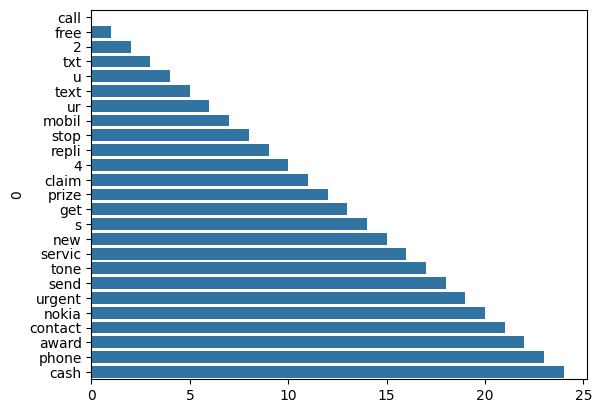

In [372]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(25))[0])
plt.show()

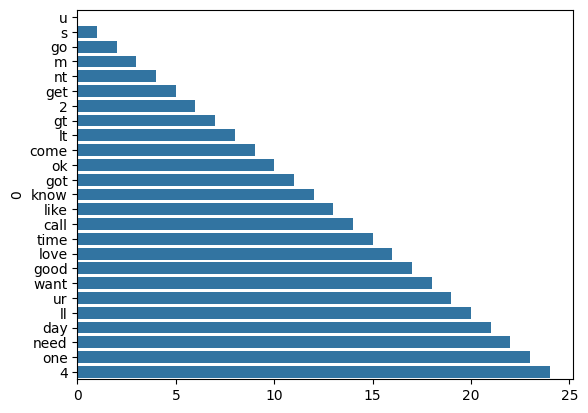

In [374]:
ham_corpus = []
for msg in data[data['ham_or_spam'] == 0]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        ham_corpus.append(word)

len(ham_corpus), ham_corpus

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(25))[0])
plt.show()

In [382]:
data.to_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\2. data_cleaning\cleaned_data.csv')

# Modeling

In [383]:
data = pd.read_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\2. data_cleaning\cleaned_data.csv')

In [387]:
data.sample(3)

,Unnamed: 0,mail,clean_mail,num_characters,num_words,num_sentences,ham_or_spam
4585,4918,Re your call; You didn't see my facebook huh?,call nt see facebook huh,45,12,1,0
1512,1561,Dnt worry...use ice pieces in a cloth pack.als...,dnt worri use ice piec cloth packalso take 2 t...,63,14,1,0
2005,2081,I'm aight. Wat's happening on your side.,m aight wat s happen side,40,11,2,0


In [416]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [388]:
x = cv.fit_transform(data['clean_mail'].astype(str)).toarray()
x.shape

(5169, 7563)

In [418]:
x = tfidf.fit_transform(data['clean_mail'].astype(str)).toarray()
x.shape

(5169, 7563)

In [419]:
y = data['ham_or_spam']

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB


train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [421]:
mnb.fit(train_x, train_y)
train_y_pred = mnb.predict(train_x)

print(confusion_matrix(train_y, train_y_pred))
print(accuracy_score(test_y, test_y_pred))
print(recall_score(test_y, test_y_pred))

[[3627    0]
 [ 125  383]]
0.8762088974854932
0.8896551724137931


In [422]:
bnb.fit(train_x, train_y)
test_y_pred = bnb.predict(test_x)

print(confusion_matrix(test_y, test_y_pred))
print(accuracy_score(test_y, test_y_pred))
print(recall_score(test_y, test_y_pred))

[[885   4]
 [ 27 118]]
0.9700193423597679
0.8137931034482758


In [423]:
gnb.fit(train_x, train_y)
test_y_pred = gnb.predict(test_x)

print(confusion_matrix(test_y, test_y_pred))
print(accuracy_score(test_y, test_y_pred))
print(recall_score(test_y, test_y_pred))

[[777 112]
 [ 21 124]]
0.8713733075435203
0.8551724137931035


# Model Comparison

In [427]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [428]:
logReg = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)

mnb = MultinomialNB()
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier(max_depth=5)

bagging = BaggingClassifier(n_estimators=50, random_state=2)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
et = ExtraTreesClassifier(n_estimators=50, random_state=2)

ab = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [440]:
classifiers = {
                'LogReg': logReg,
                'SVC': svc,
                'MNB': mnb,
                'KNN': knn,
                'DT': dt,
                'Bagging': bagging,
                'RF': rf,
                'ETC': et,
                'AdaBoost': ab,
                'XGBoost': xgb,
               }

In [437]:
def train_classifiers(name, clf, train_x, train_y, test_x, test_y):
    print(f'training {name}:')
    clf.fit(x_train, y_train)
    y_test_pred = clf.predict(test_x)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)

    return accuracy, precision_score

In [438]:
train_classifiers('svc', svc,  train_x, train_y, test_x, test_y)

training svc:


(0.9177949709864603,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

In [441]:
accuracy_lst = []
precision_lst = []

for name, clf in classifiers.items():
    accuracy, precision = train_classifiers(name, clf, train_x, train_y, test_x, test_y)
    accuracy_lst.append(accuracy)
    precision_lst.append(precision)

training LogReg:


c:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


training SVC:
training MNB:
training KNN:


c:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


training DT:


c:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


training Bagging:


In [ ]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(), 'Accuracy':accuracy_lst, 'Precision':precision_lst})
performance_df